# Laboratorium 4
### Nowoczesne Technologie Przetwarzania Danych
## *Docker i konteneryzacja modelu ML*
#### Paulina Ścieszyńska
_________________________________________________________________
### Zadanie 1: Przygotowanie aplikacji API

Przygotowałam plik `requirements.txt` zawierający odpowiednie biblioteki oraz zainstalowałam `Docker`.

_________________________________________________________________
### Zadanie 2: Dockerfile i budowa obrazu

Utworzyłam plik `app.py`:

In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route("/")
def home():
    return "Hello, Docker!"

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000)

Utworzyłam plik `Dockerfile` o następującej treści:

In [ ]:
# Użyj oficjalnego obrazu Pythona jako bazowego
FROM python:3.9-slim

# Ustaw katalog roboczy w kontenerze
WORKDIR /app

# Skopiuj plik requirements.txt do kontenera
COPY requirements.txt .

# Zainstaluj zależności Pythona
RUN pip install --no-cache-dir -r requirements.txt

# Skopiuj wszystkie pliki aplikacji do kontenera
COPY . .

# Ustaw domyślny port aplikacji
EXPOSE 5000

# Uruchom serwer aplikacji (np. Flask)
CMD ["python", "app.py"]

Zbudowałam obraz Dockera komendą: `docker build -t my-ml-app .`.

Następnie uruchomiłam kontener: `docker run -p 5000:5000 my-ml-app`.

Wynik uruchomienia w przeglądarce adresu `http://127.0.0.1:5000`:

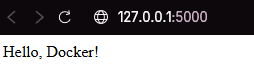

_________________________________________________________________
### Zadanie 3: Uruchamianie kontenera i testowanie endpointu

Sprawdzamy, czy uruchomiony kontener działa i wystawia port:

In [1]:
!docker ps

CONTAINER ID   IMAGE       COMMAND           CREATED         STATUS         PORTS                    NAMES
830303cdc7ce   my-ml-app   "python app.py"   4 minutes ago   Up 4 minutes   0.0.0.0:5000->5000/tcp   amazing_bhaskara


Port `5000` jest widoczny w kolumnie `PORTS`, oznacza to co oznacza, że serwer działa poprawnie.

Dodałam obsługę endpointu `/predict` do pliku `app.py`:

In [ ]:
model = joblib.load("model.pkl")

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()
    input_data = np.array(data["input"]).reshape(1, -1)
    prediction = model.predict(input_data)
    return jsonify({"prediction": int(prediction[0])})

Następnie przetestowałam zapytanie `POST` za pomocą `cURL`:

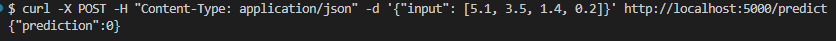

_________________________________________________________________
### Zadanie 4: Konfiguracja Docker Compose

Stworzyłam plik `docker-compose.yml` o następujacej treści:

In [ ]:
version: "3.8"

services:
  app:
    build:
      context: .
      dockerfile: Dockerfile
    ports:
      - "5000:5000"
    networks:
      - app_network
    depends_on:
      - db

  db:
    image: postgres:13
    environment:
      POSTGRES_USER: postgres
      POSTGRES_PASSWORD: postgres
      POSTGRES_DB: mydatabase
    ports:
      - "5432:5432"
    networks:
      - app_network

networks:
  app_network:
    driver: bridge

Dodałam również obsługę endpointu `/test_db`:

In [ ]:
@app.route("/test_db", methods=["GET"])
def test_db():
    try:
        conn = psycopg2.connect(
            host="db",  # Nazwa serwisu z docker-compose
            database="mydatabase",
            user="postgres",
            password="postgres"
        )
        cursor = conn.cursor()
        cursor.execute("SELECT 1;")
        result = cursor.fetchone()
        conn.close()
        return jsonify({"db_status": "connected", "result": result})
    except Exception as e:
        return jsonify({"db_status": "error", "error": str(e)})

Przetestowałam połączenie wykonując zapytanie `cURL`:

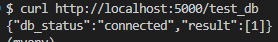

_________________________________________________________________
### Zadanie 5: Uruchomienie aplikacji w trybie produkcyjnym

#### Uruchomienie aplikacji lokalnie:

1. Utwórz środowisko wirtualne

`python -m venv myenv`

2. Aktywuj środowisko
* Windows (CMD)

`myenv\Scripts\activate`
* Windows (PowerShell)

`.\myenv\Scripts\Activate`

3. Zainstaluj zależności:

`pip install -r requirements.txt`

4. Uruchom aplikację:

`python app.py`

5. Testuj aplikację:

* Otwórz przeglądarkę i przejdź pod adres: `http://localhost:5000`.
* Przetestuj endpointy za pomocą `curl` lub Postmana.

#### Uruchomienie aplikacji za pomocą Dockera:

1. Zbuduj obraz Dockera:

`docker build -t my-ml-app .`

2. Uruchom kontener:

`docker run -p 5000:5000 my-ml-app`

5. Testuj aplikację:

* Otwórz przeglądarkę i przejdź pod adres: `http://localhost:5000`.
* Przetestuj endpointy za pomocą `curl` lub Postmana.

#### Uruchamianie aplikacji za pomocą Docker Compose

1. Uruchom serwisy:

`docker-compose up --build`

5. Testuj aplikację:

* Otwórz przeglądarkę i przejdź pod adres: `http://localhost:5000`.
* Przetestuj endpointy za pomocą `curl` lub Postmana.

#### Konfiguracja parametrów i zasobów

1. Zmienne środowiskowe:

* Parametry bazy danych są konfigurowane w pliku `docker-compose.yml`:

```
environment:
  POSTGRES_USER: postgres
  POSTGRES_PASSWORD: postgres
  POSTGRES_DB: mydatabase
```

* Jeśli uruchamiasz aplikację lokalnie, upewnij się, że te same parametry są używane w kodzie aplikacji (`app.py`).

2. Zasoby wymagane przez aplikację:

* Python 3.9 lub nowszy.
* Biblioteki wymienione w `requirements.txt`.
* Docker i Docker Compose (jeśli uruchamiasz aplikację w kontenerach).

_________________________________________________________________
### Wnioski

Na laboratorium przećwiczyłam:
- Tworzenie i uruchamianie aplikacji ML lokalnie oraz w kontenerach Docker.
- Konfigurację pliku `Dockerfile` do budowy obrazu aplikacji.
- Tworzenie i zarządzanie wieloma serwisami za pomocą `docker-compose`.
- Konfigurację bazy danych PostgreSQL i integrację z aplikacją Flask.
- Testowanie endpointów aplikacji za pomocą `curl` i Postmana.
- Rozwiązywanie problemów związanych z zależnościami i konfiguracją Dockera.
- Przygotowanie repozytorium na GitHubie z instrukcjami uruchamiania aplikacji.